In [234]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [209]:
df = pd.read_csv('D:\Thuc Hanh\-Customers\Data\marketing_campaign.csv',sep="\t")
print(df.head(10))

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7           

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\TranPhuong\AppData\Local\Temp\ipykernel_7268\3924349340.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('D:\Thuc Hanh\-Customers\Data\marketing_campaign.csv',sep="\t")


In [210]:
#Information on features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [211]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [212]:
#Kiểm tra trùng lặp
df.duplicated().value_counts()

False    2240
Name: count, dtype: int64

In [213]:
# Kiểm tra giá trị bị thiếu mất
total = df.isnull().sum().sort_values(ascending = False)
# Sum / count = percent
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_df_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df_data.head(10)

,Total,Percent
Income,24,1.071429
ID,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000
MntWines,0,0.000000


In [214]:
#  Xóa các hàng có giá trị bị thiếu 
df = df.dropna()
print("Tổng hàng sau khi xóa các hàng có giá trị bị thiếu:", len(df))

Tổng hàng sau khi xóa các hàng có giá trị bị thiếu: 2216


In [215]:
#kiểm tra các cột date ["Dt_Customer"]
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("Ngày mới nhất: ",max(dates))
print("Ngày đầu tiên: ",min(dates))

Ngày mới nhất:  2014-06-29
Ngày đầu tiên:  2012-07-30


In [216]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


In [217]:
#Thiết kế lại các cột dữ liệu mới
#Tạo cột "Age" theo năm 
df["Age"] = 2024-df["Year_Birth"]

#Tạo cột "Spent" là tổng tiền khách hàng chi tiêu ở các mục khác nhau trong dữ liệu 
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

# Tạo cột "Transaction" là tổng số lần giao dịch ở các mục khác nhau trong dữ liệu 
df['Transaction'] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumWebVisitsMonth"]
# Tạo cột "Living_With" dựa theo cột "Marital_Status"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# Tạo cột "Children" để chỉ ra tổng số trẻ em trong hộ gia đình
df["Children"]=df["Kidhome"]+df["Teenhome"]

# Tạo cột "Family_size" để chỉ rõ về quy mô gia đình
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

# Tạo cột số ngày khách hàng mua sắm tại cửa hàng cho tới ngày gần đây nhất
days = []
d1 = max(dates) 
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

#Tạo cột "Is_Parent" để theo dõi làm cha mẹ trong hộ gia đình
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

# Tạo cột "Education" để theo dõi các trình độ học vấn
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# đổi tên cột
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Xóa các cột cũ
to_drop = ["Marital_Status","Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
# to_drop_notID = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
data = df.drop(to_drop, axis=1)
# data_ID = df.drop(to_drop_notID, axis=1)

C:\Users\TranPhuong\AppData\Local\Temp\ipykernel_7268\3889972276.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]


In [218]:
data.describe()

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Age,Spent,Transaction,Children,Family_Size,Customer_For,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000
mean,5588.353339,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,0.013538,0.009477,0.150271,55.179603,607.075361,17.876354,0.947202,2.592509,3.054423e+16,0.714350
std,3249.376275,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,0.115588,0.096907,0.357417,11.985554,602.900476,6.548176,0.749062,0.905722,1.749036e+16,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,2814.750000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,47.000000,69.000000,12.000000,0.000000,2.000000,1.555200e+16,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,54.000000,396.500000,17.000000,1.000000,3.000000,3.071520e+16,1.000000
75%,8421.750000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,65.000000,1048.000000,23.000000,1.000000,3.000000,4.570560e+16,1.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,131.000000,2525.000000,38.000000,3.000000,5.000000,6.039360e+16,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

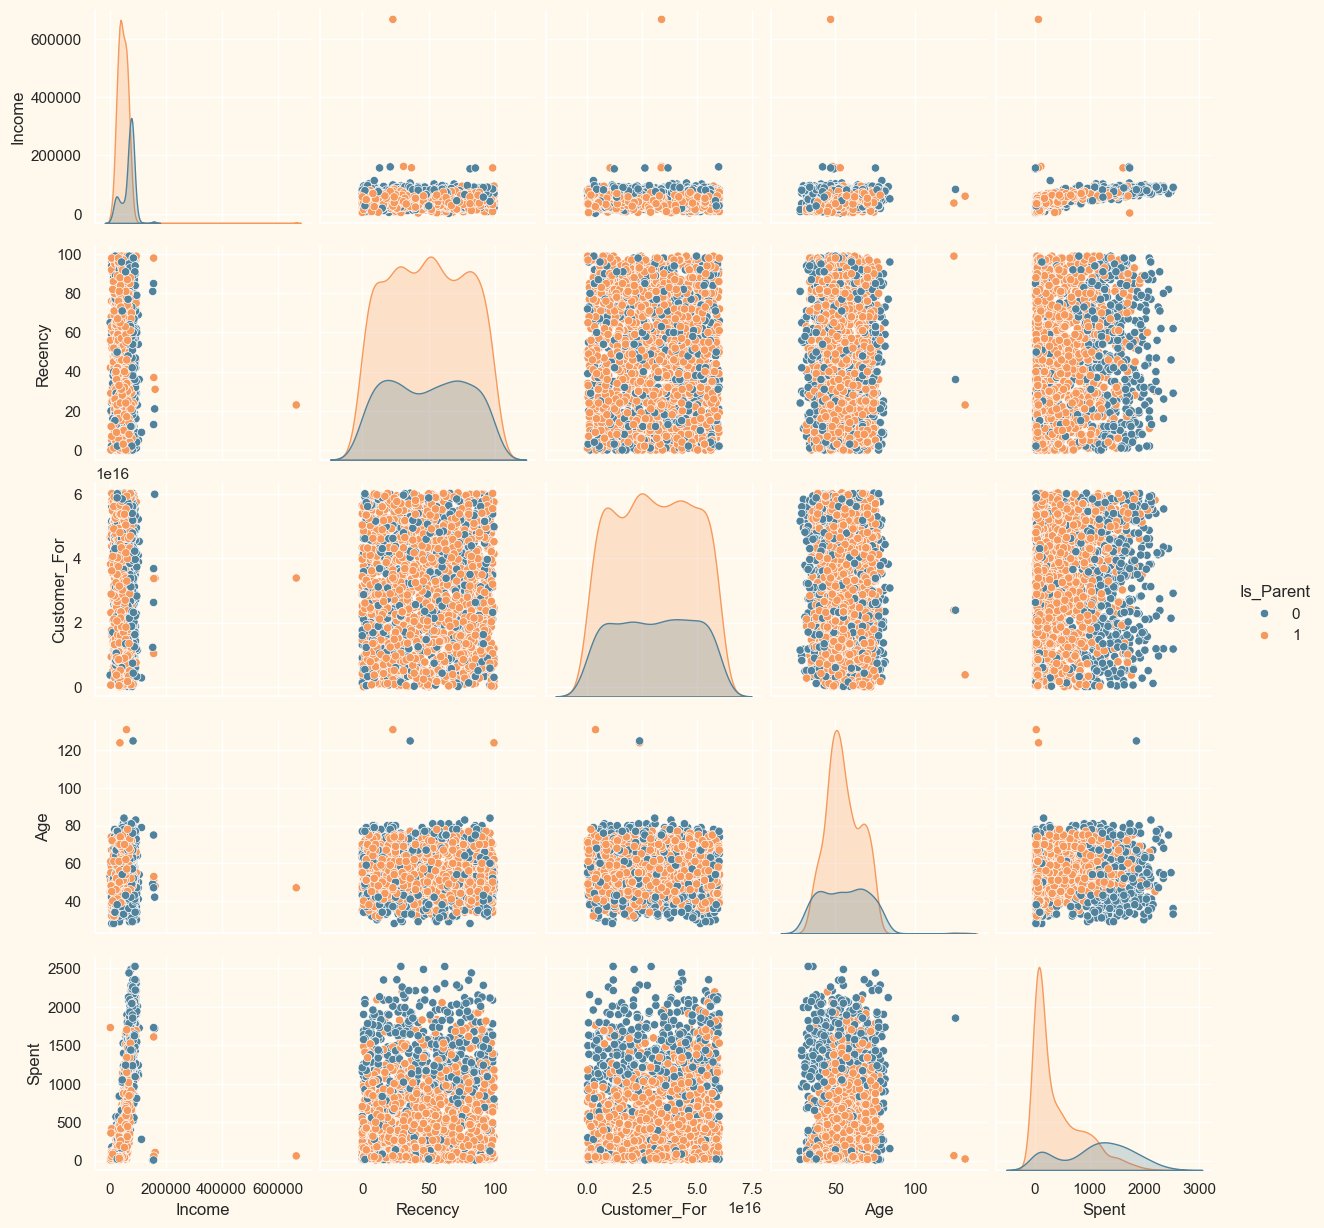

In [219]:
#Vẽ giá trị ngoại lai 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#51829B","#F6995C"]))
#Taking hue 
plt.show()

In [220]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("Tổng data sau khi loại bỏ giá trị ngoại lai", len(data))

Tổng data sau khi loại bỏ giá trị ngoại lai 2212


## Phân tích RFM

In [221]:
# Frequency(tầnsuất)
RFM = pd.DataFrame()

# Thêm cột 'frequency' và 'monetary' vào DataFrame rỗng
RFM['ID'] = data['ID']
RFM['Recency'] = data['Recency']
RFM['Transaction'] = data['Transaction']
RFM['Spent'] = data['Spent']
# Đổi tên 
RFM.columns = ['ID', 'Recency', 'Frequency', 'Monetary']

RFM

,ID,Recency,Frequency,Monetary
0,5524,58,29,1617
1,2174,38,9,27
2,4141,26,24,776
3,6182,26,12,53
4,5324,94,19,422
...,...,...,...,...
2235,10870,46,21,1341
2236,4001,56,22,444
2237,7270,91,24,1241
2238,8235,8,24,843


Reletive Plot Of Some Selected Features: A Data Subset


c:\Users\TranPhuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\TranPhuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\TranPhuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\TranPhuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\TranPhuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` 

<Figure size 640x480 with 0 Axes>

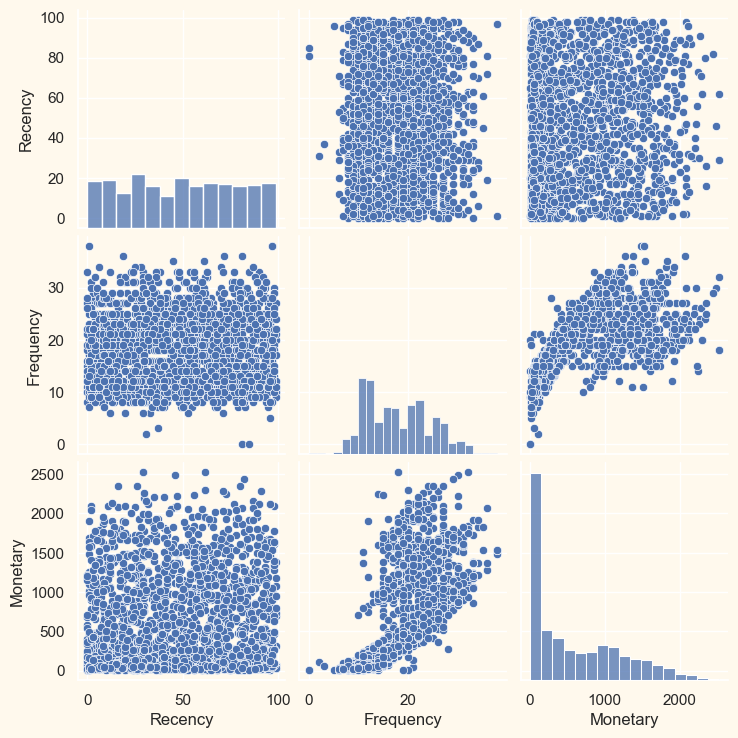

In [222]:
X = [ "Recency", "Frequency", "Monetary"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(RFM[X],palette= (["#51829B","#F6995C"]))
#Taking hue 
plt.show()

In [223]:
print(RFM)

         ID  Recency  Frequency  Monetary
0      5524       58         29      1617
1      2174       38          9        27
2      4141       26         24       776
3      6182       26         12        53
4      5324       94         19       422
...     ...      ...        ...       ...
2235  10870       46         21      1341
2236   4001       56         22       444
2237   7270       91         24      1241
2238   8235        8         24       843
2239   9405       40         15       172

[2212 rows x 4 columns]


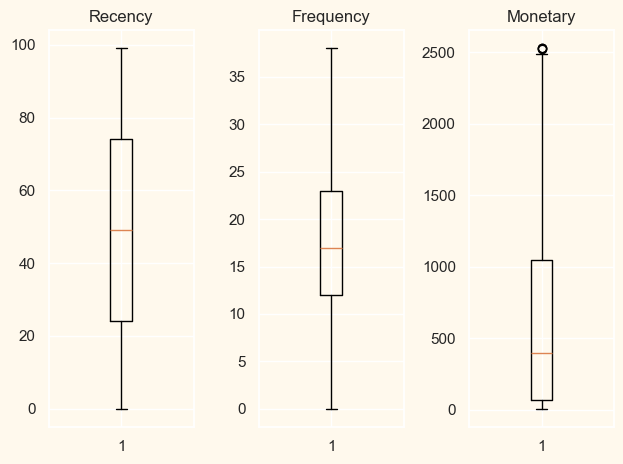

In [224]:
fig, axs = plt.subplots(1, 3)

#Recency
axs[0].boxplot(RFM['Recency'])
axs[0].set_title('Recency')

# Creating plot 
axs[1].boxplot(RFM['Frequency'])
axs[1].set_title('Frequency')

# Monetary 
axs[2].boxplot(RFM['Monetary'])
axs[2].set_title('Monetary')

plt.tight_layout()
plt.show()

In [229]:
# Removing outliers for Monetary
Q1 =RFM['Monetary'].quantile(0.25)
Q3 =RFM['Monetary'].quantile(0.75)
IQR =Q3-Q1
rfm = RFM[(RFM['Monetary'] >= Q1- 1.5*IQR) & (RFM['Monetary'] <= Q3 + 1.5*IQR)]

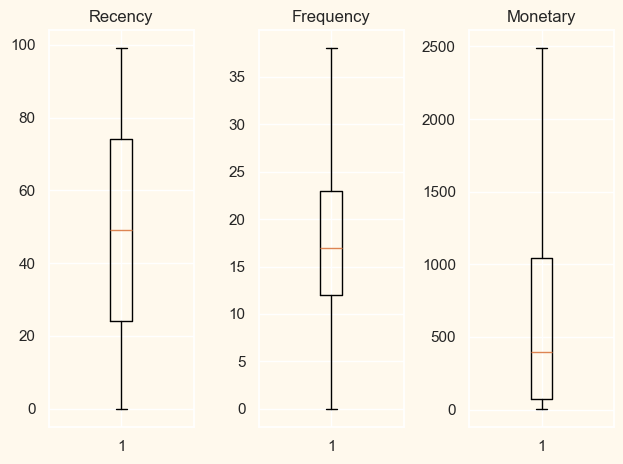

In [231]:
fig, axs = plt.subplots(1, 3)

#Recency
axs[0].boxplot(rfm['Recency'])
axs[0].set_title('Recency')

# Creating plot 
axs[1].boxplot(rfm['Frequency'])
axs[1].set_title('Frequency')

# Monetary 
axs[2].boxplot(rfm['Monetary'])
axs[2].set_title('Monetary')

plt.tight_layout()
plt.show()

### DATA PREPROCESSING

The following steps are applied to preprocess the data:

- Label encoding the categorical features
- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction

In [232]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [235]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [236]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [237]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Transaction,Living_With,Children,Family_Size,Customer_For,Is_Parent
0,-0.018837,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,...,-0.555814,0.692181,1.018352,1.676245,1.697662,-1.349603,-1.264598,-1.758359,1.527721,-1.581139
1,-1.050626,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,...,-1.171160,-0.132545,1.274785,-0.963297,-1.357978,-1.349603,1.404572,0.449070,-1.189011,0.632456
2,-0.444797,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,...,1.290224,-0.544908,0.334530,0.280110,0.933752,0.740959,-1.264598,-0.654644,-0.206048,-1.581139
3,0.183824,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,...,-0.555814,0.279818,-1.289547,-0.920135,-0.899632,0.740959,0.069987,0.449070,-1.060584,0.632456
4,-0.080437,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,...,0.059532,-0.132545,-1.033114,-0.307562,0.169842,0.740959,0.069987,0.449070,-0.951915,0.632456


## Sử dụng PCA để giảm chiều dữ liệu

In [238]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-2.120064e-16,2.961343,-5.621260,-2.704883,-0.735489,2.594418,7.674653
col2,2212.0,1.284887e-17,1.789062,-4.440660,-1.380298,-0.224651,1.290900,6.247935
col3,2212.0,-1.525804e-17,1.268947,-4.023224,-0.886660,-0.045876,0.910530,6.760615


## Gom nhóm

Elbow Method to determine the number of clusters to be formed:


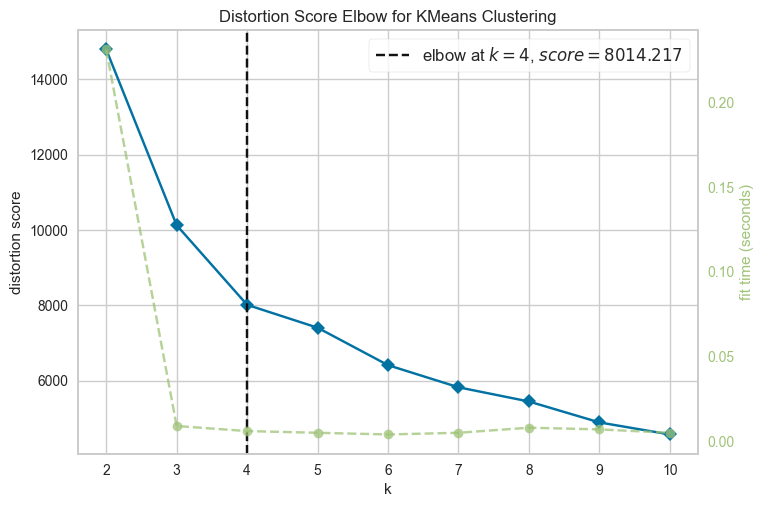

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [239]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()